In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
transactions_df = pd.read_csv('transaction_data.csv')
purchase_df = pd.read_csv('purchase_behaviour.csv')

## Pre-Processing

In [3]:
transactions_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
transactions_df.info()
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
m

In [6]:
transactions_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [7]:
purchase_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [8]:
# Merging of the csv files 
merged_df = transactions_df.merge(purchase_df, on="LYLTY_CARD_NBR")

In [9]:
merged_df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [10]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [12]:
## converting the catagorical data to numerical data
merged_df['PREMIUM_CUSTOMER'] = merged_df['PREMIUM_CUSTOMER'].astype('category').cat.codes
merged_df['LIFESTAGE'] = merged_df['LIFESTAGE'].astype('category').cat.codes

In [13]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,6,2
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,0,0
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,0,0
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,0,0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,0,0


# Traning and Evaluation

## Most Profitable Products 

In [14]:
# Aggregate total sales per product
product_sales = merged_df.groupby(["PROD_NBR", "PROD_NAME"]).agg(total_sales=("TOT_SALES", "sum"), total_quantity=("PROD_QTY", "sum")).reset_index()

In [15]:
Top_products = product_sales.nlargest(3, "total_sales")
print("Top 3 Profitable Products:")
print(Top_products)

Top 3 Profitable Products:
    PROD_NBR                                 PROD_NAME  total_sales  \
3          4          Dorito Corn Chp     Supreme 380g      40352.0   
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6   
15        16  Smiths Crinkle Chips Salt & Vinegar 330g      34804.2   

    total_quantity  
3             6509  
13            6164  
15            6106  


/var/folders/mz/_mgl45y53018fg9xtlkwt0_m0000gn/T/ipykernel_5801/1965340143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PROD_NAME', y='total_sales', data=Top_products, palette='viridis')


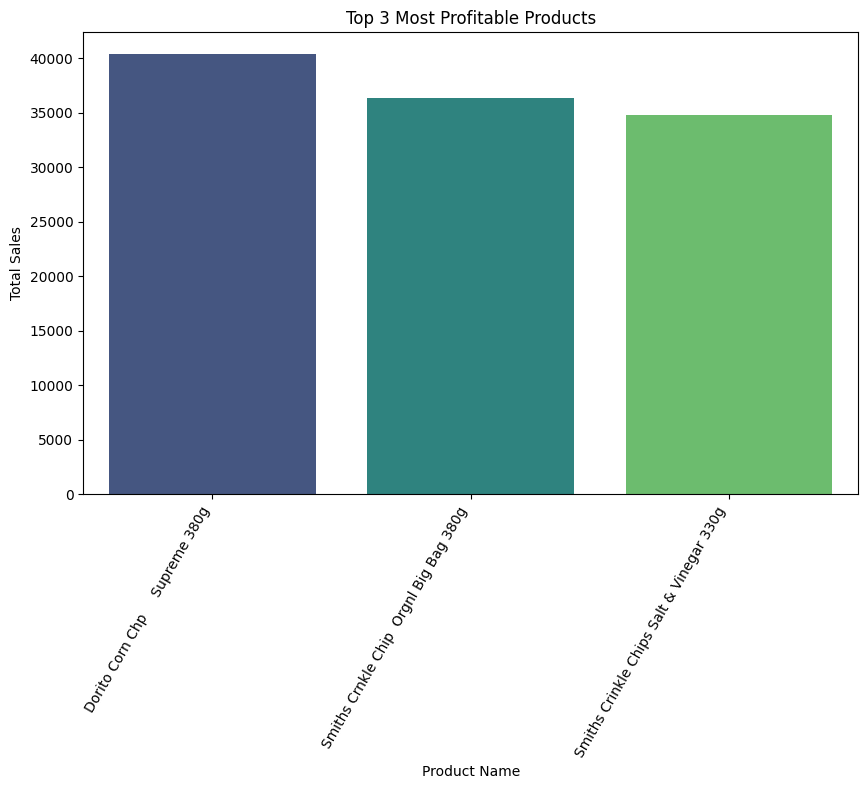

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PROD_NAME', y='total_sales', data=Top_products, palette='viridis')
plt.xticks(rotation=60, ha='right')
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.title("Top 3 Most Profitable Products")
plt.show()

## Loyal Customers

In [17]:
# total spending and number of transactions per customer
customer_spending = merged_df.groupby("LYLTY_CARD_NBR").agg(total_spent=("TOT_SALES", "sum"), txn_count=("TXN_ID", "count")).reset_index()

In [18]:
customer_spending.head()

,LYLTY_CARD_NBR,total_spent,txn_count
0,1000,6.0,1
1,1002,2.7,1
2,1003,6.6,2
3,1004,1.9,1
4,1005,2.8,1


### Standardizaton/Normalization


In [19]:
# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_spending[['total_spent', 'txn_count']] = scaler.fit_transform(customer_spending[['total_spent', 'txn_count']])

## Modal Traning

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
silhouette_scores = []
K_range = range(2, 6)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_spending[['total_spent', 'txn_count']])
    silhouette_scores.append(silhouette_score(customer_spending[['total_spent', 'txn_count']], labels))

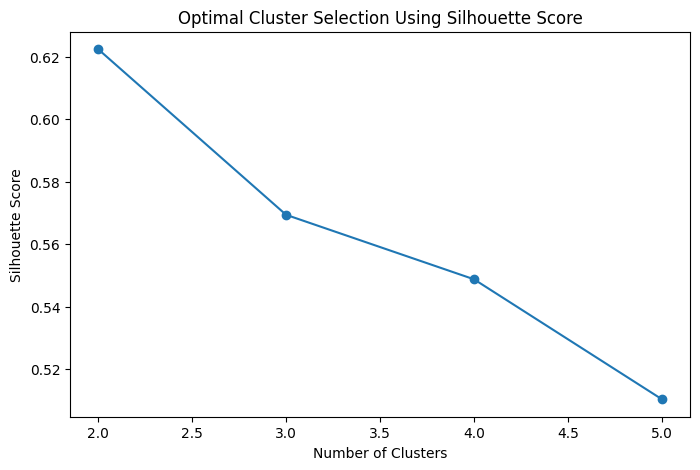

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal Cluster Selection Using Silhouette Score")
plt.show()

### K-means Clustering

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_spending["Cluster"] = kmeans.fit_predict(customer_spending[['total_spent', 'txn_count']])

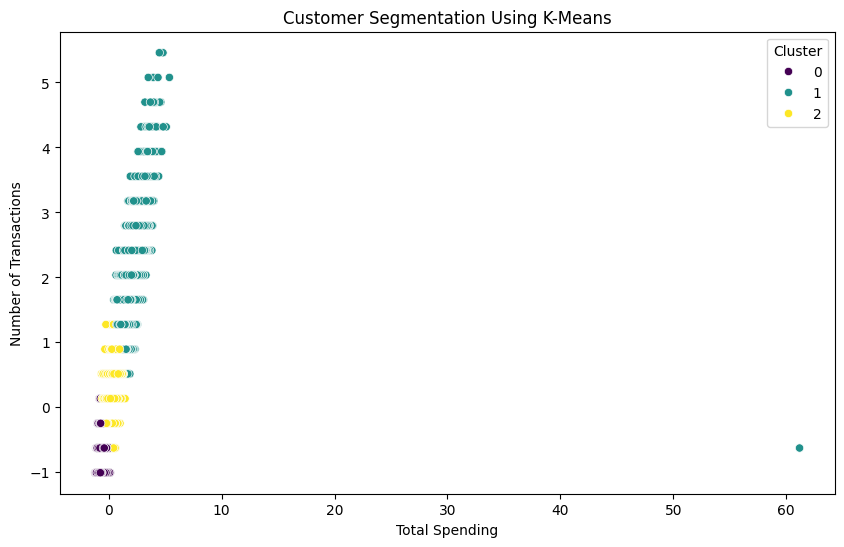

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_spending, x="total_spent", y="txn_count", hue="Cluster", palette="viridis")
plt.xlabel("Total Spending")
plt.ylabel("Number of Transactions")
plt.title("Customer Segmentation Using K-Means")
plt.show()

In [25]:
loyal_customers = customer_spending.groupby("Cluster").agg(
    avg_spent=("total_spent", "mean"),
    avg_txns=("txn_count", "mean"),
    count=("LYLTY_CARD_NBR", "count")
)
print(loyal_customers)

         avg_spent  avg_txns  count
Cluster                            
0        -0.791512 -0.789838  35907
1         1.618327  1.693172  12848
2         0.319427  0.276646  23882


In [26]:
loyal_cluster = loyal_customers['avg_spent'].idxmax()

most_loyal_customers = customer_spending[customer_spending["Cluster"] == loyal_cluster]
print("Most Loyal Customers:")
print(most_loyal_customers.head())  

Most Loyal Customers:
     LYLTY_CARD_NBR  total_spent  txn_count  Cluster
672            3014     1.987527   1.275227        1
673            3015     1.295691   0.895014        1
679            3022     2.607296   2.035653        1
681            3024     1.117927   0.895014        1
688            3031     1.406192   0.895014        1


In [27]:

loyal_customers = merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TXN_ID"].count().reset_index()
loyal_customers.rename(columns={"TXN_ID": "total_transactions"}, inplace=True)
loyal_customers = loyal_customers.sort_values(by="total_transactions", ascending=False)

print("Most Loyal Customer Segments:")
print(loyal_customers.head(3))

Most Loyal Customer Segments:
    LIFESTAGE  PREMIUM_CUSTOMER  total_transactions
6           2                 0               23160
13          4                 1               21466
19          6                 1               20854


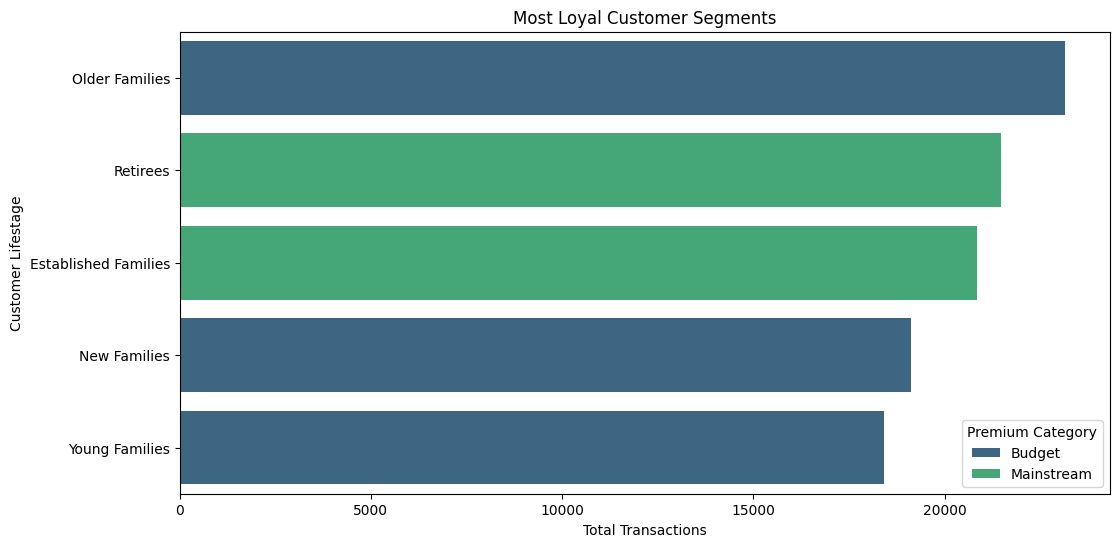

In [30]:
lifestage_mapping = {
    0: "Young Singles/Couples",
    1: "Midage Singles/Couples",
    2: "Older Families",
    3: "Young Families",
    4: "Retirees",
    5: "New Families",
    6: "Established Families"
}

premium_mapping = {
    0: "Budget",
    1: "Mainstream",
    2: "Premium"
}

loyal_customers["LIFESTAGE"] = loyal_customers["LIFESTAGE"].map(lifestage_mapping)
loyal_customers["PREMIUM_CUSTOMER"] = loyal_customers["PREMIUM_CUSTOMER"].map(premium_mapping)


plt.figure(figsize=(12, 6))
sns.barplot(
    x="total_transactions",
    y="LIFESTAGE",
    hue="PREMIUM_CUSTOMER",
    data=loyal_customers.head(5),  
    palette="viridis"
)

plt.xlabel("Total Transactions")
plt.ylabel("Customer Lifestage")
plt.title("Most Loyal Customer Segments")
plt.legend(title="Premium Category")
plt.show()

## Evaluation


In [29]:
sil_score = silhouette_score(customer_spending[['total_spent', 'txn_count']], customer_spending['Cluster'])
print(f"Silhouette Score for K-Means Clustering: {sil_score:.2f}")


Silhouette Score for K-Means Clustering: 0.57
